# Instagram Data Report

## Author: Kendall McCoy

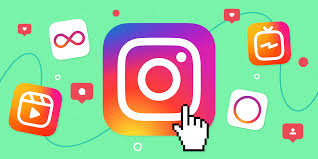

### Overview

 In this report I will being breaking it down to examine and explain what is going on with it. The question I am trying to answer is what are some of the top accounts whose content I liked the most based off the data and the number of likes.

### Data

For this report the data was retrieved from Instagram through the request page. If you want to examine your own Instagram data you can do it here: https://www.instagram.com/download/request/. Once downloaded a file named "likes.json" is found and loaded into the environment. Json is the format of the data and how it will be read. 

In [3]:
from matplotlib import pyplot as plt
import json 
from datetime import datetime as dt
import seaborn

In [4]:
import pandas as pd 

The packages above were used in the analysis. 

In [5]:
with open(r'C:\Users\kcmcc\Documents\Instagram data\likes\liked_posts.json') as k:
    klikes = json.load(k)

In [6]:
klikes.keys()

dict_keys(['likes_media_likes'])

This an example of how the Instagram data is structured. It presents the "title" being the account name. And there is the "timestamp" that is when I liked the post on the account. 

In [25]:
klikes['likes_media_likes'][0] 

{'title': 'chloebailey',
 'media_list_data': [],
 'string_list_data': [{'href': '',
   'value': 'ð\x9f\x91\x8d',
   'timestamp': 1612392850}]}

In [8]:
type(klikes['likes_media_likes'][0]) 

dict

In [9]:
klikes['likes_media_likes'][0]['title']

'chloebailey'

In [10]:
klikes['likes_media_likes'][0]['string_list_data'][0]['timestamp']

1612392850

Examples of the accounts and names pulled from the data

In [11]:
accounts = [x['title'] for x in klikes['likes_media_likes']]
accounts[:10] 

['chloebailey',
 'ecambage',
 'kit.pandolfo',
 'yaonlylivvonce',
 'harmonthelow',
 'chloebailey',
 'laaciiee_',
 'kit.pandolfo',
 'ecambage',
 'melaniepcruzzzz']

The exact times of when a post was liked 

In [12]:
timestamp = [x['string_list_data'][0]['timestamp'] for x in klikes['likes_media_likes']]
timestamp[:10]

[1612392850,
 1612387747,
 1612317737,
 1612229868,
 1612227828,
 1612224931,
 1612211944,
 1612192764,
 1612156114,
 1612150454]

In [13]:
print(len(accounts), len(timestamp))

2089 2089


In [14]:
klikes_df = pd.DataFrame({'accounts' : accounts, 'timestamp': timestamp})
klikes_df.head()

,accounts,timestamp
0,chloebailey,1612392850
1,ecambage,1612387747
2,kit.pandolfo,1612317737
3,yaonlylivvonce,1612229868
4,harmonthelow,1612227828


In [15]:
count_klikes = klikes_df.groupby('accounts').count()
count_klikes.head()

,timestamp
accounts,
0nly1mel_,2
1.emmit,1
15sof,1
1karlton1,1
1zerich,2


In [16]:
count_klikes.sort_values('timestamp' ,ascending=False).head()

,timestamp
accounts,
houseofhighlights,142
melaniepcruzzzz,94
chaniaray,57
cierraramirez,44
snitchery,42


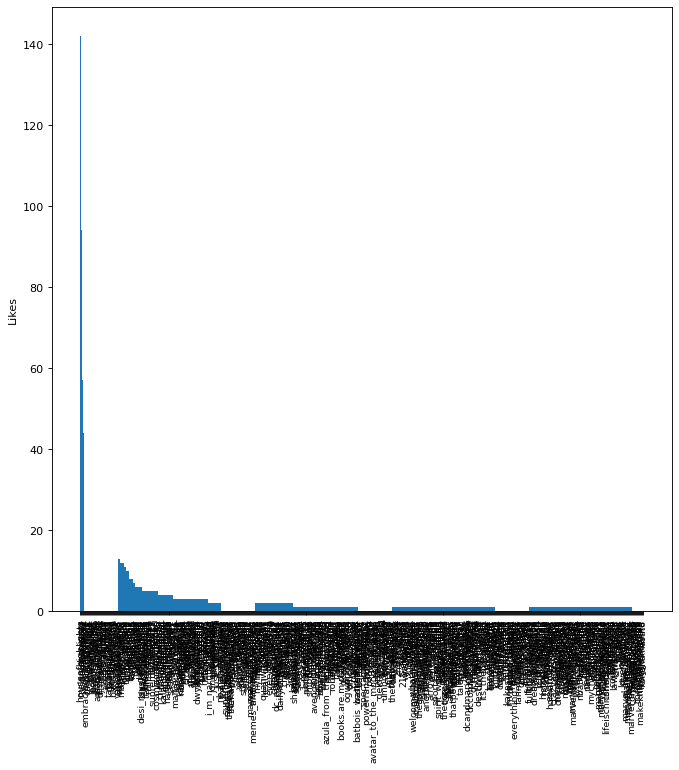

In [18]:
sortcount = count_klikes.sort_values('timestamp' ,ascending=False)
labels = sortcount['timestamp'].keys()
vals = sortcount['timestamp']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

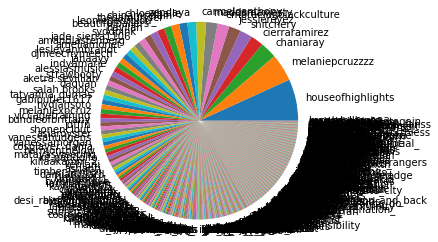

In [19]:
fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
plt.show()

In [20]:
toplikes = count_klikes['timestamp'] > 40
countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]
other = countsbot.sum()

piedat = countstop.append(pd.DataFrame(other['timestamp'], columns = ['timestamp'], index = ['other < 50']))
piedat.head()

<ipython-input-20-5a5e16e6fa85>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]


,timestamp
houseofhighlights,142
melaniepcruzzzz,94
chaniaray,57
cierraramirez,44
snitchery,42


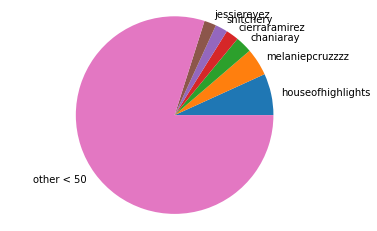

In [21]:
vals = piedat['timestamp']
labels = piedat['timestamp'].keys()


fig3, ax3 = plt.subplots()
ax3.pie(vals, labels = labels)
ax3.axis('equal')
plt.show()

### Analysis

The analysis of the data revealed the top 6 accounts that I liked the most on Instagram and compared them together and to the rest of the gathered Instagram data. Certain parts of the data was called to answer the research question. Them being the account name and the number of likes. The account names are pulled when the "title" data is called and the amount of likes which each title is counted and tallied. 

### Conclusions

Based off the data it was revealed that the top accounts of mine are House of Highlights, Melanie P Cruz, Chania Ray, Cierra Ramirez, Snitchery and Jessie Reyez. These are the top 6 based off the constraints of having at least 50 likes, with House of Highlights having the most at 142 and Jessie Reyez with the lowest of the top 6 with 42. Overall it revealed that most of accounts belonged to social media influencers and content creators along with an actress, a musician and sports outlet with a multitude of different accounts factored in also. Something that could have been done different is examining the the accounts that have similar number of likes and why. Maybe it is because both accounts belong to athletes or celebrities. That could be why the number of likes are close in number to one another.  

https://www.youtube.com/channel/UCqQo7ewe87aYAe7ub5UqXMw : House of Highlights

http://www.jessiereyez.com/ : Jessie Reyez

https://www.imdb.com/name/nm2028116/ : Cierra Ramirez 